<a href="https://colab.research.google.com/github/rharris9/SYSM578/blob/main/Monkeypox_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reviewing the data for Exploratory Analysis

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import data
data = pd.read_table('https://raw.githubusercontent.com/rharris9/SYSM578/fe7e9ab94229ede30fddfeb9f04742124b8fe741/Sysm578Final.csv',sep='\,',header=(0))
data.index = data.ID
#data = data.drop(columns=['ID'])
data.head()

#save feature names
features = data.iloc[1:, 0].values

#drop or remove "id" column from the data
dataT = np.transpose(data)

features

array(['P1', 'P2', 'P3', ..., 'P24997', 'P24998', 'P24999'], dtype=object)

In [49]:
#dataT = np.transpose(data)
data.head()


,ID,SystemicIllness,RectalPain,SoreThroat,PenileOedema,OralLesions,SolitaryLesion,SwollenTonsils,HIVInfection,SexuallyTransmittedInfection,MonkeyPox
ID,,,,,,,,,,,
P0,P0,None,False,True,True,True,False,True,False,False,Negative
P1,P1,Fever,True,False,True,True,False,False,True,False,Positive
P2,P2,Fever,False,True,True,False,False,False,True,False,Positive
P3,P3,None,True,False,False,False,True,True,True,False,Positive
P4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [4]:
len(features)

24999

In [5]:
clin_data = data

clin_data.head()

,ID,SystemicIllness,RectalPain,SoreThroat,PenileOedema,OralLesions,SolitaryLesion,SwollenTonsils,HIVInfection,SexuallyTransmittedInfection,MonkeyPox
ID,,,,,,,,,,,
P0,P0,None,False,True,True,True,False,True,False,False,Negative
P1,P1,Fever,True,False,True,True,False,False,True,False,Positive
P2,P2,Fever,False,True,True,False,False,False,True,False,Positive
P3,P3,None,True,False,False,False,True,True,True,False,Positive
P4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [6]:
import plotly.express as px

count_df = pd.DataFrame(data.SystemicIllness.value_counts().to_frame())
count_df['ID'] = count_df.index

fig1 = px.bar(count_df, x='ID', y='SystemicIllness', color='ID',
             title="Summary by Systemic Symptom",
             labels={'ID':'SystemicIllness', 'SystemicIllness':'Count of Samples'}, height=800, width = 1000)
fig1.update(layout_showlegend=False)
fig1.update_layout(template='simple_white', xaxis_tickangle=-90)
fig1.show()

In [7]:
count_df

,SystemicIllness,ID
Fever,6382,Fever
Swollen Lymph Nodes,6252,Swollen Lymph Nodes
None,6216,None
Muscle Aches and Pain,6150,Muscle Aches and Pain


This looks like for the systemic illness (non-specific/common symptoms) that it is roughly equally distributed

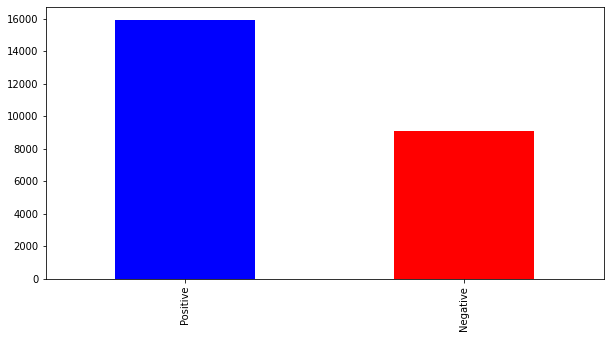

In [8]:
clin_data.MonkeyPox.value_counts().plot.bar(figsize=(10,5), color=['b', 'r']);

In [9]:
data.MonkeyPox.value_counts()

Positive    15909
Negative     9091
Name: MonkeyPox, dtype: int64

In [10]:
data.describe()

,ID,SystemicIllness,RectalPain,SoreThroat,PenileOedema,OralLesions,SolitaryLesion,SwollenTonsils,HIVInfection,SexuallyTransmittedInfection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,4,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [11]:
for x in clin_data.columns:
    if x != 'MonkeyPox':
        fig = px.histogram(clin_data, x = x ,color='MonkeyPox',title = x.upper() )
        fig.show()

# Processing the Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px



# Import the LabelEncoder and KMeans classes from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Load the dataset using pandas
data = pd.read_table('https://raw.githubusercontent.com/rharris9/SYSM578/fe7e9ab94229ede30fddfeb9f04742124b8fe741/Sysm578Final.csv',sep='\,',header=(0))
data.head

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



<bound method NDFrame.head of            ID      SystemicIllness  RectalPain  SoreThroat  PenileOedema  \
0          P0                 None       False        True          True   
1          P1                Fever        True       False          True   
2          P2                Fever       False        True          True   
3          P3                 None        True       False         False   
4          P4  Swollen Lymph Nodes        True        True          True   
...       ...                  ...         ...         ...           ...   
24995  P24995                 None        True        True         False   
24996  P24996                Fever       False        True          True   
24997  P24997                 None        True        True         False   
24998  P24998  Swollen Lymph Nodes       False        True         False   
24999  P24999  Swollen Lymph Nodes       False       False          True   

       OralLesions  SolitaryLesion  SwollenTonsils  HIVIn

Converting the categorical data to numerical data for creating the model. This will be done by using label encoders to assign a numeral to corresponding categorical data

In [50]:
ndata = data
ndata.head

<bound method NDFrame.head of             ID      SystemicIllness  RectalPain  SoreThroat  PenileOedema  \
ID                                                                          
P0          P0                 None       False        True          True   
P1          P1                Fever        True       False          True   
P2          P2                Fever       False        True          True   
P3          P3                 None        True       False         False   
P4          P4  Swollen Lymph Nodes        True        True          True   
...        ...                  ...         ...         ...           ...   
P24995  P24995                 None        True        True         False   
P24996  P24996                Fever       False        True          True   
P24997  P24997                 None        True        True         False   
P24998  P24998  Swollen Lymph Nodes       False        True         False   
P24999  P24999  Swollen Lymph Nodes       Fals

In [61]:
encoder = LabelEncoder()

# Apply the encoder to all columns in the data
data = data.apply(encoder.fit_transform)

#checking the data
data.head

<bound method NDFrame.head of            ID  SystemicIllness  RectalPain  SoreThroat  PenileOedema  \
ID                                                                     
P0          0                2           0           1             1   
P1          1                0           1           0             1   
P2      11112                0           0           1             1   
P3      17223                2           1           0             0   
P4      18334                3           1           1             1   
...       ...              ...         ...         ...           ...   
P24995  16663                2           1           1             0   
P24996  16664                0           0           1             1   
P24997  16665                2           1           1             0   
P24998  16666                3           0           1             0   
P24999  16667                3           0           0             1   

        OralLesions  SolitaryLesi

In [62]:
data

,ID,SystemicIllness,RectalPain,SoreThroat,PenileOedema,OralLesions,SolitaryLesion,SwollenTonsils,HIVInfection,SexuallyTransmittedInfection,MonkeyPox
ID,,,,,,,,,,,
P0,0,2,0,1,1,1,0,1,0,0,0
P1,1,0,1,0,1,1,0,0,1,0,1
P2,11112,0,0,1,1,0,0,0,1,0,1
P3,17223,2,1,0,0,0,1,1,1,0,1
P4,18334,3,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
P24995,16663,2,1,1,0,1,1,0,0,1,1
P24996,16664,0,0,1,1,0,1,1,1,1,1
P24997,16665,2,1,1,0,0,1,1,0,0,1


# Applying Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
# Create an instance of the KMeans class with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(data)

# Predict the cluster labels for the data
labels = kmeans.predict(data)

hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=3).fit(data)
birch_m = Birch(n_clusters=3).fit(data)

In [16]:
kmeans

KMeans(n_clusters=3)

In [17]:
Status = data.loc[0] 
Status = list(data)[10] 
Status

'MonkeyPox'

In [18]:
sample_names = data.loc[0] 
sample_names = list(data)[1:]
sample_names

['SystemicIllness',
 'RectalPain',
 'SoreThroat',
 'PenileOedema',
 'OralLesions',
 'SolitaryLesion',
 'SwollenTonsils',
 'HIVInfection',
 'SexuallyTransmittedInfection',
 'MonkeyPox']

In [19]:
Symptom = data.loc[0] 
Symptom = list(data)[1:] 
Symptom

['SystemicIllness',
 'RectalPain',
 'SoreThroat',
 'PenileOedema',
 'OralLesions',
 'SolitaryLesion',
 'SwollenTonsils',
 'HIVInfection',
 'SexuallyTransmittedInfection',
 'MonkeyPox']

In [20]:
len(data.loc[0])

11

In [59]:
data.head

<bound method NDFrame.head of             ID      SystemicIllness  RectalPain  SoreThroat  PenileOedema  \
ID                                                                          
P0          P0                 None       False        True          True   
P1          P1                Fever        True       False          True   
P2          P2                Fever       False        True          True   
P3          P3                 None        True       False         False   
P4          P4  Swollen Lymph Nodes        True        True          True   
...        ...                  ...         ...         ...           ...   
P24995  P24995                 None        True        True         False   
P24996  P24996                Fever       False        True          True   
P24997  P24997                 None        True        True         False   
P24998  P24998  Swollen Lymph Nodes       False        True         False   
P24999  P24999  Swollen Lymph Nodes       Fals

In [21]:
d = {'Labels':Status, 'Kmeans':kmeans.labels_, 'Hclust':hclust_m.labels_, 'Birch':birch_m.labels_}
df = pd.DataFrame(d)
print(df)

          Labels  Kmeans  Hclust  Birch
0      MonkeyPox       1       2      2
1      MonkeyPox       1       2      2
2      MonkeyPox       2       0      1
3      MonkeyPox       0       1      0
4      MonkeyPox       0       1      0
...          ...     ...     ...    ...
24995  MonkeyPox       2       1      0
24996  MonkeyPox       2       1      0
24997  MonkeyPox       2       1      0
24998  MonkeyPox       2       1      0
24999  MonkeyPox       2       1      0

[25000 rows x 4 columns]


# Random Forest

In [44]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Loading the data and split it into training and test set
df = data
# Selecting  relevant columns
X = df[[ 'SystemicIllness','RectalPain', 'SoreThroat', 'PenileOedema', 'OralLesions', 'SolitaryLesion', 'SwollenTonsils', 'HIVInfection', 'SexuallyTransmittedInfection']]
y = df['MonkeyPox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# fitting it to the training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = clf.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.68


Model Accuracy is 68% 

In [24]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 677 1154]
 [ 488 2681]]


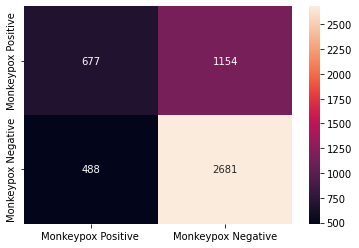

In [25]:
# Create a heatmap of the confusion matrix

ax = sns.heatmap(cm, annot=True, fmt='d',
                 xticklabels=['Monkeypox Positive ', 'Monkeypox Negative'],
                 yticklabels=['Monkeypox Positive', 'Monkeypox Negative'])

# Using LazyPredict

In [26]:
!pip uninstall scikit-learn -y -q
!pip install scikit-learn==0.24 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [27]:
import warnings
warnings.filterwarnings('ignore')

!pip install lazypredict -q

In [28]:
import time 
from lazypredict.Supervised import LazyClassifier

model=LazyClassifier(verbose=0,predictions=True)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# fitting and training the model 
start_time_1=time.time()
models_c,predictions_c=model.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()


100%|██████████| 29/29 [02:10<00:00,  4.49s/it]


In [29]:
fig = px.bar(models_c[['Time Taken', 'F1 Score','Accuracy']], barmode='group', template='simple_white'
)
fig.update_layout(width=1200, height=700, template='simple_white', title="Classification Report")
fig.show()

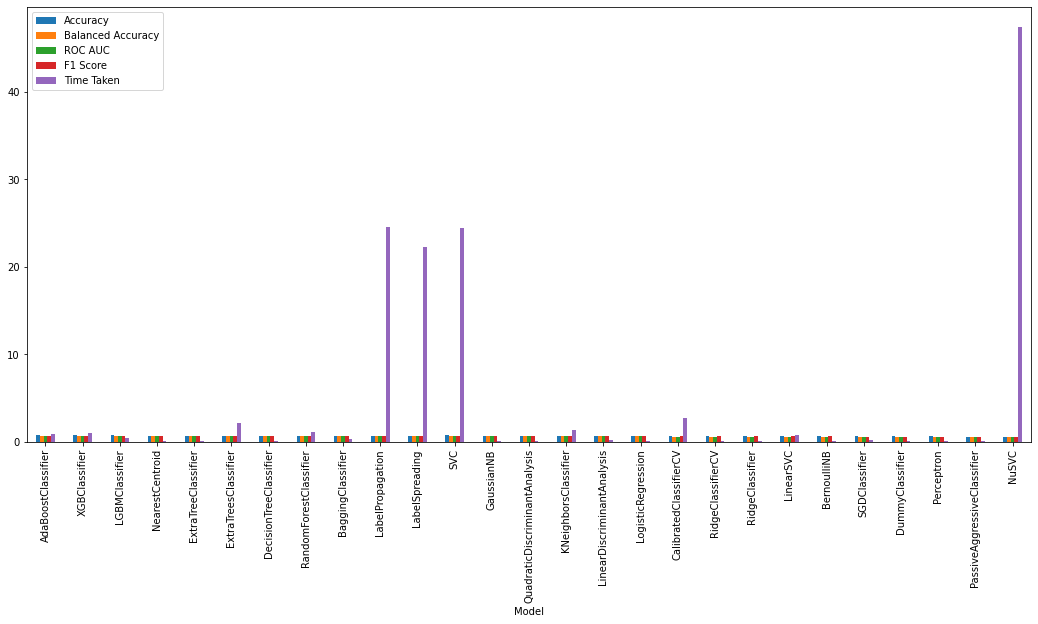

In [30]:
models_c.plot.bar(figsize = (18,8));

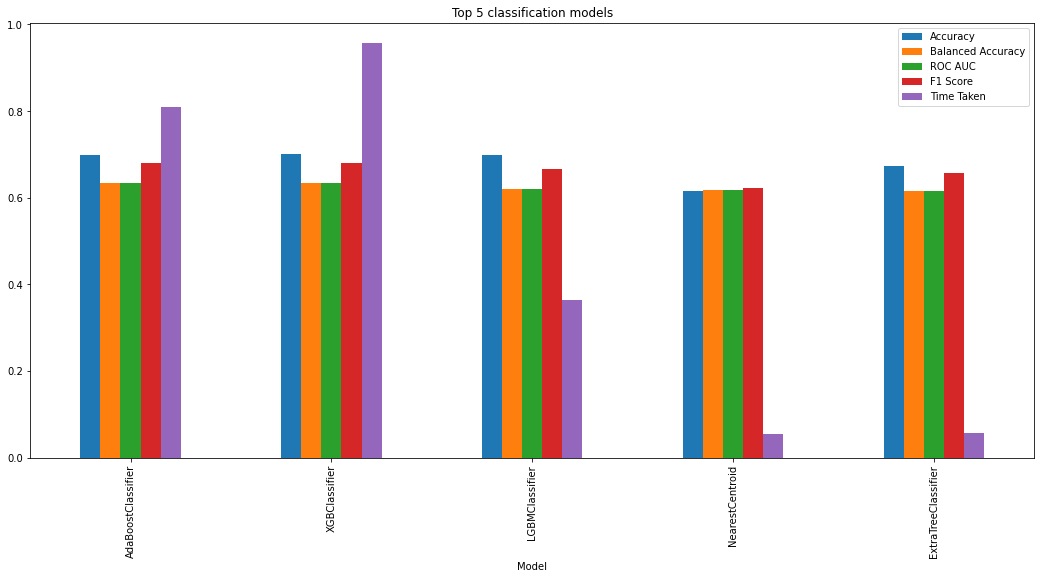

In [31]:
models_c.iloc[0:5].plot.bar(figsize = (18,8), title="Top 5 classification models");

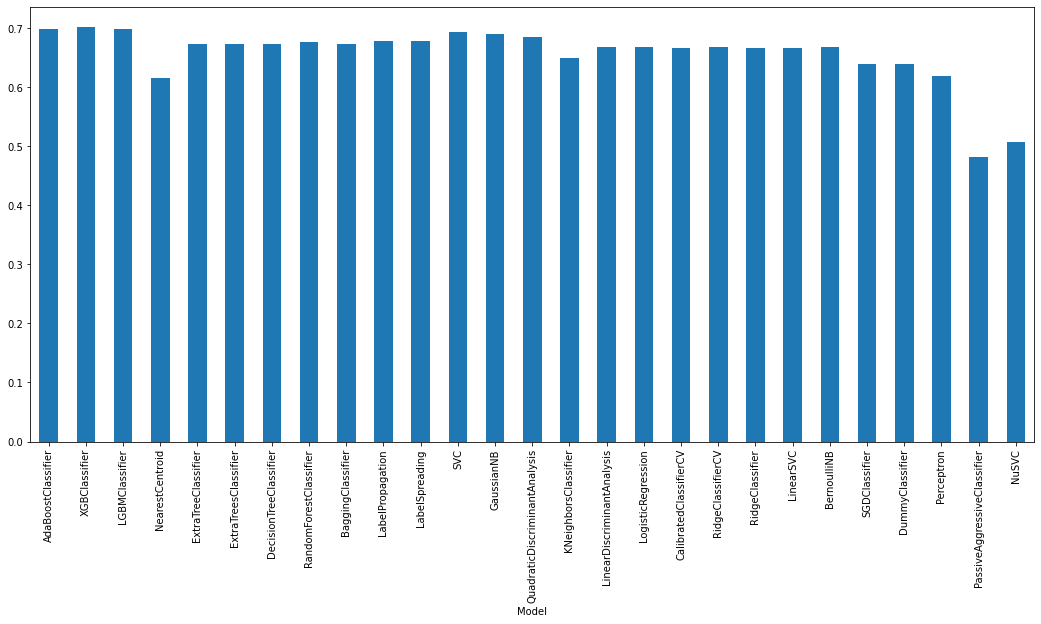

In [32]:
models_c['Accuracy'].plot.bar(figsize = (18,8));

In [33]:
predictions_c

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
4,0,0,1,1,0,1,0,0,0,1,...,0,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
7496,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7497,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7498,1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1


# Using Ridge Regression




In [34]:
from keras.layers import Dense,Input,Dropout
from tensorflow.keras import layers, models, losses, optimizers, regularizers
from keras.models import Model
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier as ANN

In [35]:
from sklearn.linear_model import RidgeClassifier
clf2 = RidgeClassifier().fit(X, y)
clf.score(X, y) #x and y variables from earlier

0.7002

In [36]:
clf2.predict (X)



array([1, 1, 1, ..., 1, 0, 1])

In [37]:
y_pred = clf2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 675 2037]
 [ 446 4342]]


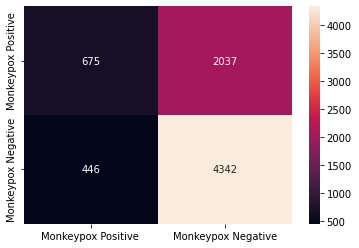

In [38]:

ax = sns.heatmap(cm, annot=True, fmt='d',
                 xticklabels=['Monkeypox Positive ', 'Monkeypox Negative'],
                 yticklabels=['Monkeypox Positive', 'Monkeypox Negative'])

In [39]:
accuracy = clf2.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.67


Looks like using Ridge Regression has a similar  accuracy to random forest


In [47]:
ndata

,ID,SystemicIllness,RectalPain,SoreThroat,PenileOedema,OralLesions,SolitaryLesion,SwollenTonsils,HIVInfection,SexuallyTransmittedInfection,MonkeyPox
0,0,2,0,1,1,1,0,1,0,0,0
1,1,0,1,0,1,1,0,0,1,0,1
2,11112,0,0,1,1,0,0,0,1,0,1
3,17223,2,1,0,0,0,1,1,1,0,1
4,18334,3,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
24995,16663,2,1,1,0,1,1,0,0,1,1
24996,16664,0,0,1,1,0,1,1,1,1,1
24997,16665,2,1,1,0,0,1,1,0,0,1
24998,16666,3,0,1,0,1,1,1,0,0,0


In [51]:
ndata.head

<bound method NDFrame.head of             ID      SystemicIllness  RectalPain  SoreThroat  PenileOedema  \
ID                                                                          
P0          P0                 None       False        True          True   
P1          P1                Fever        True       False          True   
P2          P2                Fever       False        True          True   
P3          P3                 None        True       False         False   
P4          P4  Swollen Lymph Nodes        True        True          True   
...        ...                  ...         ...         ...           ...   
P24995  P24995                 None        True        True         False   
P24996  P24996                Fever       False        True          True   
P24997  P24997                 None        True        True         False   
P24998  P24998  Swollen Lymph Nodes       False        True         False   
P24999  P24999  Swollen Lymph Nodes       Fals

In [55]:


mpox = ndata.iloc[:, 10:].values
status = np.unique(mpox)
n_status = len(status)

str(status)

"['Negative' 'Positive']"

In [56]:
from sklearn import tree

#plot the decision tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], 
                   feature_names=features, 
                   filled=True, rounded=True, 
                   class_names=status)

AttributeError: ignored

<Figure size 1440x1440 with 0 Axes>